# Task 1: Introduction

In [144]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [145]:
def generate_examples(num=1000):
    W = [1.0, -3.0]
    b=float(1)
    W= np.reshape(W, (2,1))
    X=np.random.randn(num, 2)
    y = b + np.dot(X, W) + np.random.randn()
    y = np.reshape(y, (num, 1))
    return X,y

In [146]:
X, y=generate_examples()

In [147]:
print(X.shape, y.shape)

(1000, 2) (1000, 1)


In [148]:
print(X[0], y[0])

[ 0.10266912 -0.39193048] [2.98523889]


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [149]:
class Model(object):
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

In [150]:
model = Model(2)
print(model.W)
print(model.b)

[[-2.41122008]
 [ 0.68323496]]
-0.3656073746639611


# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [151]:
class Model(Model):
    def forward_pass(self, X):
        y_hat = self.b + np.dot(X, self.W)
        return y_hat

In [152]:
y_hat = Model(2).forward_pass(X)
print(y_hat.shape)

(1000, 1)


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [153]:
class Model(Model):
    def compute_loss(self, y_hat, y):
        return np.sum(np.square(y - y_hat))/(2*y_hat.shape[0])

In [154]:
model = Model(2)
y_hat = model.forward_pass(X)
loss = model.compute_loss(y_hat, y)

In [155]:
loss

7.634174071973397

# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [156]:
class Model(Model):
    def backward_pass(self, y_hat, y_true, X):
        m = y_hat.shape[0]
        db = (1/m)*np.sum(y_hat - y_true)
        dw = (1/m)*np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)
        return db, dw

In [157]:
mod = Model(2)

X, y = generate_examples()
y_hat = model.forward_pass(X)
db, dW = mod.backward_pass(y_hat, y, X)


In [158]:
print(db, dW)

0.8305406499849582 [-2.75961012  2.96444121]


# Task 7: Update Parameters

In [159]:
class Model(Model):
    def update_parameters(self, db, dW, lr):
        self.W = self.W - lr*np.reshape(dW, (self.num_features, 1))
        self.b = self.b - db

# Task 8: Training Loop

In [160]:
class Model(Model):
    def train(self, x_train, y_train, iterations, lr):
        losses=[]
        for i in range(iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            db, dW = self.backward_pass(y_hat, y_train, x_train)
            self.update_parameters(db, dW, lr)
            losses.append(loss)
            if i % int(iterations/10) == 0:
                print("Iter: {}, Loss: {:.4f}".format(i, loss))
        return(losses)

In [161]:
model = Model(2)

In [162]:
x_train, y_train = generate_examples()

In [163]:
losses = model.train(x_train, y_train, 1000, 3e-3)

Iter: 0, Loss: 9.3839
Iter: 100, Loss: 3.8363
Iter: 200, Loss: 2.1041
Iter: 300, Loss: 1.1540
Iter: 400, Loss: 0.6330
Iter: 500, Loss: 0.3472
Iter: 600, Loss: 0.1904
Iter: 700, Loss: 0.1045
Iter: 800, Loss: 0.0573
Iter: 900, Loss: 0.0314


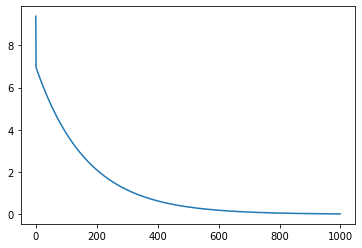

In [164]:
plt.plot(losses)

# Task 9: Predictions

In [193]:
model_untrained = Model(2)

x_test, y_test = generate_examples(500)
print(x_test.shape, y_test.shape)

(500, 2) (500, 1)


In [194]:
preds_untrained = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)

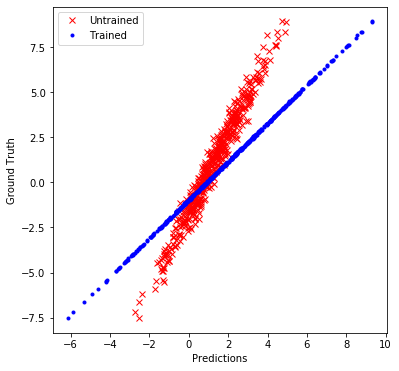

In [195]:
plt.figure(figsize = (6, 6))
plt.plot(preds_untrained, y_test, 'rx', label="Untrained")
plt.plot(preds_trained, y_test, 'b.', label="Trained")
plt.legend()
plt.xlabel("Predictions")
plt.ylabel("Ground Truth")
plt.show()